In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
var_to_plot = "median"

parameter_name_map = {"alpha" : "concentration", 
                      "context_similarity_depth_2" : "context 2", 
                      "context_similarity_depth_1" : "context 1",
                      "repeat_bias_1_back" : "repeat bias",
                      "timeconstant_within_session_A" : "time constant"}

sim_0_params = {"concentration" : 2,
    "context 1" : 0.75,
    "context 2" : 0.75,
    "time constant" : 20,
    "repeat bias" : 0.75}
sim_1_params = {"concentration" : 8,
    "context 1" : 0.25,
    "context 2" : 0.25,
    "time constant" : 40,
    "repeat bias" : 0.25}

def load(sim, block):
    df_a  = pd.DataFrame()
    df2_a = pd.DataFrame()

    for sim_c in sim:
        
        df = pd.read_pickle(f"Results/Simulations/sim_summary_{sim_c}_block_{block}.pkl")
        df.index.name = "parameter"
        df = df.reset_index()
        df["simulation"] = sim_c
        df["parameter"] = df["parameter"].map(parameter_name_map)
        df2 = df.pivot(index=["simulation","run"],columns=["parameter"], values=[var_to_plot]).droplevel(0,axis=1)

        df_a  = pd.concat([df_a, df]).reset_index()
        df2_a = pd.concat([df2_a,df2])
    ms = df2_a.reset_index().groupby("simulation").mean()
    return df_a, df2_a, ms

sim_params_df2 = pd.concat([pd.DataFrame(sim_0_params,index=[0]), pd.DataFrame(sim_1_params,index=[1])])
sim_params_df2.index.name = "simulation"

sim_params_df = sim_params_df2.melt(ignore_index=False).rename(columns={"value" : "true", "variable" : "parameter"}).reset_index()

sim_params_df2

,concentration,context 1,context 2,time constant,repeat bias
simulation,,,,,
0,2,0.75,0.75,20,0.75
1,8,0.25,0.25,40,0.25


(0.15, -0.2)

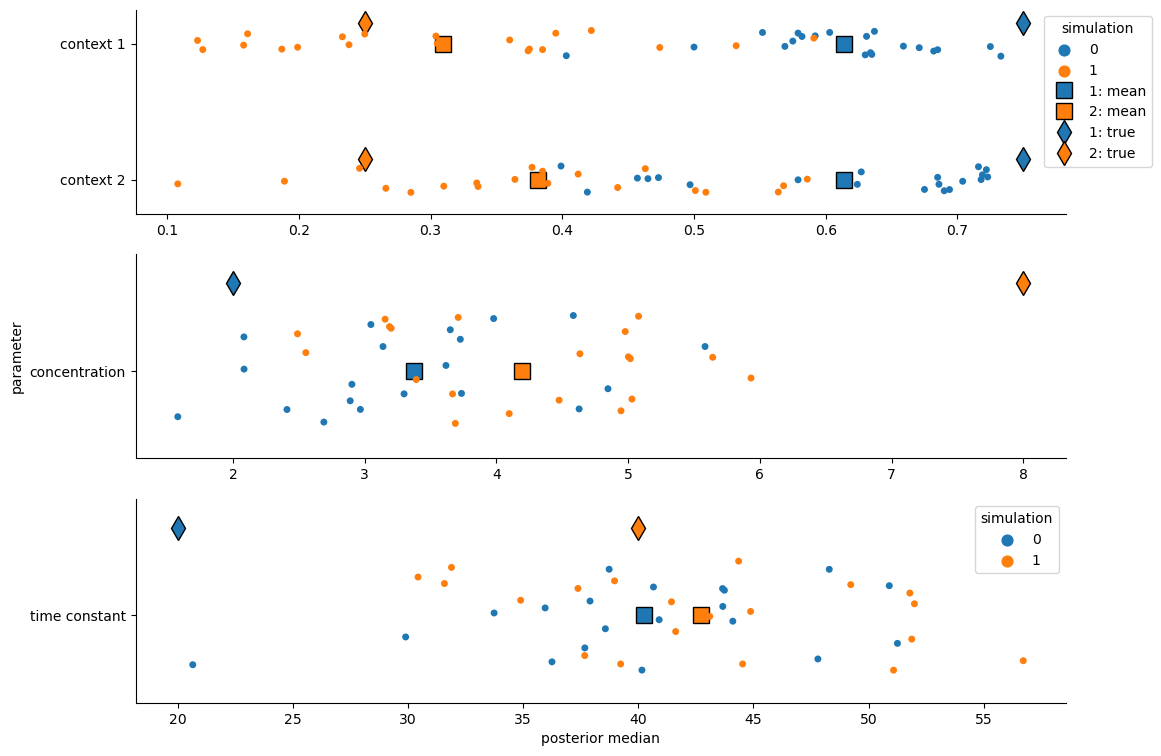

In [176]:
df, df2, ms = load([0,1],1)

true_offset = -0.15;
mean_offset = 0;

# sns.stripplot(data=df, x="median", y="parameter", hue="simulation")
plt.figure(figsize=(12,9))
ax1 = plt.subplot(3, 1, 1)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
df3            = df2[           ["context 1", "context 2"]].melt(ignore_index=False).rename(columns={"value": var_to_plot}).reset_index()
sim_params_df3 = sim_params_df2[["context 1", "context 2"]].melt(ignore_index=False).rename(columns={"value": "true", "variable" : "parameter"}).reset_index()

p = sns.stripplot(data=df3, x="median", y="parameter", hue="simulation")


pp1 = plt.plot([ms["context 1"].loc[0], ms["context 2"].loc[0]],[0+mean_offset,1+mean_offset],"s",markeredgecolor=[0,0,0],markersize=12,zorder=1, label="1: mean")
pp2 =plt.plot([ms["context 1"].loc[1], ms["context 2"].loc[1]],[0+mean_offset,1+mean_offset],"s",markeredgecolor=[0,0,0],markersize=12,zorder=1, label="2: mean")
plt.plot([sim_params_df2["context 1"].loc[0], sim_params_df2["context 2"].loc[0]],[0+true_offset,1+true_offset],"d",markeredgecolor=[0,0,0],markersize=12,color=pp1[0].get_color(),zorder=1, label="1: true")
plt.plot([sim_params_df2["context 1"].loc[1], sim_params_df2["context 2"].loc[1]],[0+true_offset,1+true_offset],"d",markeredgecolor=[0,0,0],markersize=12,color=pp2[0].get_color(),zorder=1, label="2: true")

# pp1[0].get_color()
plt.xlabel('')
plt.ylabel('')
plt.ylim([1.25, -0.25])
p.legend(title="simulation",bbox_to_anchor = (1.1, 0.6), loc='center right')


ax2 = plt.subplot(3, 1, 2)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
df3            = df2[           ["concentration"]].melt(ignore_index=False).rename(columns={"value": var_to_plot}).reset_index()
sim_params_df3 = sim_params_df2[["concentration"]].melt(ignore_index=False).rename(columns={"value": "true", "variable" : "parameter"}).reset_index()

p2 = sns.stripplot(data=df3, x="median", y="parameter", hue="simulation")
pp1 = plt.plot([ms["concentration"].loc[0]],[0+mean_offset],"s",markeredgecolor=[0,0,0],markersize=12,zorder=1, label="1: mean")
pp2 =plt.plot([ms["concentration"].loc[1]],[0+mean_offset],"s",markeredgecolor=[0,0,0],markersize=12,zorder=1, label="2: mean")
plt.plot([sim_params_df2["concentration"].loc[0]],[0+true_offset],"d",markeredgecolor=[0,0,0],markersize=12,color=pp1[0].get_color(),zorder=1, label="1: true")
plt.plot([sim_params_df2["concentration"].loc[1]],[0+true_offset],"d",markeredgecolor=[0,0,0],markersize=12,color=pp2[0].get_color(),zorder=1, label="2: true")

plt.xlabel('')
plt.ylim([0.15, -0.2])
p2.legend().remove()


ax3 = plt.subplot(3, 1, 3)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
df3            = df2[           ["time constant"]].melt(ignore_index=False).rename(columns={"value": var_to_plot}).reset_index()
sim_params_df3 = sim_params_df2[["time constant"]].melt(ignore_index=False).rename(columns={"value": "true", "variable" : "parameter"}).reset_index()

p3 = sns.stripplot(data=df3, x="median", y="parameter", hue="simulation")
pp1 = plt.plot([ms["time constant"].loc[0]],[0+mean_offset],"s",markeredgecolor=[0,0,0],markersize=12,zorder=1, label="1: mean")
pp2 =plt.plot([ms["time constant"].loc[1]],[0+mean_offset],"s",markeredgecolor=[0,0,0],markersize=12,zorder=1, label="2: mean")
plt.plot([sim_params_df2["time constant"].loc[0]],[0+true_offset],"d",markeredgecolor=[0,0,0],markersize=12,color=pp1[0].get_color(),zorder=1, label="1: true")
plt.plot([sim_params_df2["time constant"].loc[1]],[0+true_offset],"d",markeredgecolor=[0,0,0],markersize=12,color=pp2[0].get_color(),zorder=1, label="2: true")
plt.xlabel('posterior median')
plt.ylabel('')
plt.ylim([0.15, -0.2])
